<a href="https://colab.research.google.com/github/7REVOLUTiOn/Python-and-other-/blob/main/5.%20%D0%91%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B0%20Pandas.%20%D0%92%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9%20%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%965_%D0%91%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B0_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №5. Библиотека Pandas. Визуальный анализ данных

## Комплексное задание №1. Применение основных методов для анализа данных

1. Скачайте этот блокнот к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература
- [**Блокнот с теорией**](https://colab.research.google.com/drive/1SLqmaYz4xEsxVV-LGwb3ityheBTzHJQu?usp=sharing)
- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с Вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [3]:
%matplotlib inline
import pandas as pd
pd.__version__

'2.2.2'

Если вы увидели warning, не переживайте, всё хорошо.
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [4]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values=' ?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [5]:
print(df.tail(10))

       age      workclass  fnlwgt      education  education.num  \
32551   32        Private   34066           10th              6   
32552   43        Private   84661      Assoc-voc             11   
32553   32        Private  116138        Masters             14   
32554   53        Private  321865        Masters             14   
32555   22        Private  310152   Some-college             10   
32556   27        Private  257302     Assoc-acdm             12   
32557   40        Private  154374        HS-grad              9   
32558   58        Private  151910        HS-grad              9   
32559   22        Private  201490        HS-grad              9   
32560   52   Self-emp-inc  287927        HS-grad              9   

            marital.status          occupation    relationship  \
32551   Married-civ-spouse   Handlers-cleaners         Husband   
32552   Married-civ-spouse               Sales         Husband   
32553        Never-married        Tech-support   Not-in-family  

2) Сколько колонок и сколько строк в этом датасете?

In [6]:
num_rows, num_columns = df.shape
print(num_rows, num_columns)

32561 15


3) Какие типы данных у элементов этого датасета?

In [9]:
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object


4) Какие признаки имеют пропуски?

In [10]:
missing_values = df.isnull().sum()

print(missing_values[missing_values > 0])

workclass         1836
occupation        1843
native.country     583
dtype: int64


5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Люди, которые не работают (например, пенсионеры или студенты), могут оставлять поля workclass и occupation пустыми, так как эти поля к ним не применимы. Респонденты могли пропустить эти поля из-за нежелания делиться информацией или ошибок при заполнении. В native.country пропуски могли возникнуть из-за нежелания указывать страну происхождения или из-за того, что люди считают эту информацию неважной. Также пропуски могли появиться из-за технических ошибок при сборе или обработке данных.Ваш ответ:

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [11]:
workclass_counts = df['workclass'].value_counts(dropna=False)

print(workclass_counts)

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
NaN                   1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64


:7) Какой средний возраст женщин и мужчин?

In [12]:
print(df.groupby('sex')['age'].mean())

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64


8) Постройте гистограмму(bar) распределения образования людей (education)

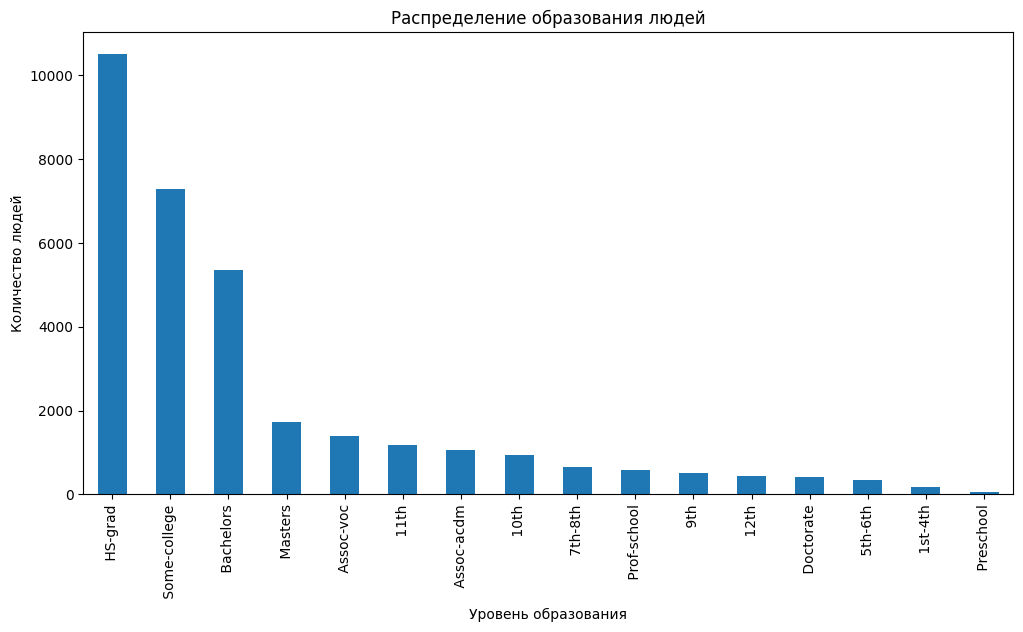

In [16]:
import matplotlib.pyplot as plt

education_counts = df['education'].value_counts()

plt.figure(figsize=(12, 6))
education_counts.plot(kind = 'bar')
plt.title("Распределение образования людей")
plt.title('Распределение образования людей')
plt.xlabel('Уровень образования')
plt.ylabel('Количество людей')
plt.show()

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак income) и тех, кто получает менее 50K в год?

In [17]:
age_stats = df.groupby('income')['age'].agg(['mean', 'std'])
print(age_stats)

             mean        std
income                      
<=50K   36.783738  14.020088
>50K    44.249841  10.519028


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [18]:
higher_education = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']
high_income_df = df[df['income'] == '>50K']
all_have_higher_education = high_income_df['education'].isin(higher_education).all()

print(all_have_higher_education)

True


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [19]:
print(f'Количество женатых богатых мужчин: {df[(df["sex"]==" Male") & (df["marital.status"].str.contains(" Married")) & (df["income"] == " >50K")].shape[0]}')
print(f'Количество неженатых богатых мужчин: {df[(df["sex"]==" Male") & (df["income"] == " >50K")].shape[0] - df[(df["sex"]==" Male") & (df["marital.status"].str.contains(" Married")) & (df["income"] == " >50K")].shape[0]}')

Количество женатых богатых мужчин: 5965
Количество неженатых богатых мужчин: 697


12) Постройте [сводную таблицу](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) для отображения зависимостей среднего времени работы (hours.per.week) с доходом (income) для каждой страны (native.country).  


> Пример фрагмента таблицы:



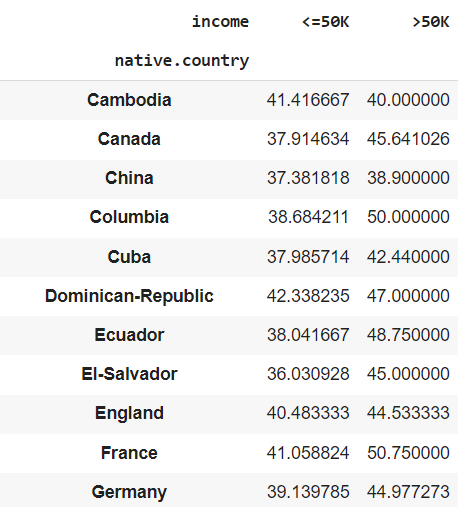

In [20]:
# Создание сводной таблицы
pivot_table = df.pivot_table(
    values='hours.per.week',  # Значения для агрегации
    index='native.country',   # Группировка по странам
    columns='income',         # Разделение по доходу
    aggfunc='mean'            # Агрегация: среднее значение
)

print(pivot_table)

income                          <=50K       >50K
native.country                                  
Cambodia                    41.416667  40.000000
Canada                      37.914634  45.641026
China                       37.381818  38.900000
Columbia                    38.684211  50.000000
Cuba                        37.985714  42.440000
Dominican-Republic          42.338235  47.000000
Ecuador                     38.041667  48.750000
El-Salvador                 36.030928  45.000000
England                     40.483333  44.533333
France                      41.058824  50.750000
Germany                     39.139785  44.977273
Greece                      41.809524  50.625000
Guatemala                   39.360656  36.666667
Haiti                       36.325000  42.750000
Holand-Netherlands          40.000000        NaN
Honduras                    34.333333  60.000000
Hong                        39.142857  45.000000
Hungary                     31.300000  50.000000
India               

13) Постройте сводную таблицу для сравнения уровня образования и разности между capital.gain и capital.loss по следующему алгоритму:&nbsp;  
1. Создайте вспомогательную таблицу (датафрейм) и добавьте в неё столбец "education" из целевой таблицы
2. Добавьте во вспомогательную таблицу ещё один столбец "capital.diff", значиниями которого будут являться разности столбцов capital.gain и capital.loss целевой таблицы
3. Удалите во вспомогательной таблице все строки, в которых значение столбца "capital.diff" равно нулю  
&nbsp; Подсказка:
```
summary_table = summary_table[summary_table['capital.diff'] != 0 ]
```
4. Для набора значений из столбца "capital.diff", необходимо сформировать 10 категорий (кластеров), это можно сделать с помощью математических функций, типа log, извлечение корня N-ой степени и округления, для последующего перехода к категориальным признакам.  
  * В нашем случае, можно воспользоваться методом [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) и равномерно разделить наш набор данных на целевое количество категорий
5. Добавьте во вспомогательную таблицу столбец "categories", и проинициализируйте его значениями категорий, которые возвращает метод pd.qcut()  
&nbsp; Пример:
```
summary_table['categories'] = pd.qcut(summary_table["capital.diff"], q = 10)

6. Постройте сводную таблицу с помощью метода pivot_table(),

Примерная структура таблицы (в качестве значений выводится количество людей, относящихся к той или иной группе):

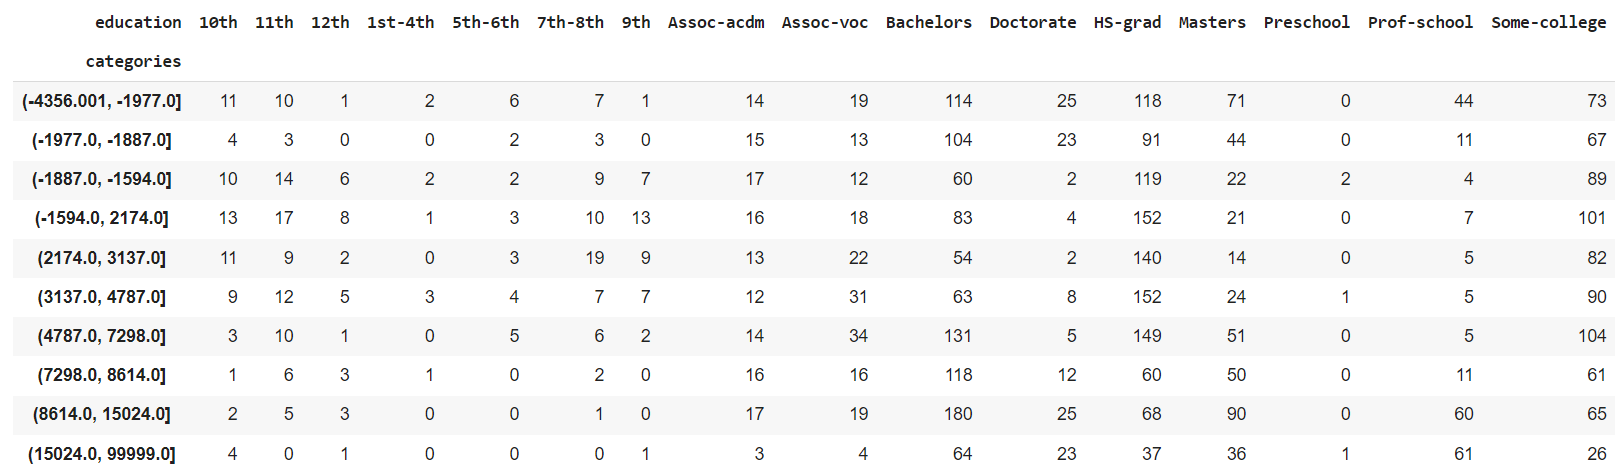

In [21]:
summary_table = df[['education']].copy() #  copy для того, чтобы summary_talbe был датафреймом, иначе он будет Series и ничего не будет работать
summary_table['capital.diff'] = df['capital.gain'] - df['capital.loss'] #  capital.diff не создастся в summary_table без copy выше
summary_table = summary_table[summary_table['capital.diff'] != 0]
summary_table['categories'] = pd.qcut(summary_table["capital.diff"], q = 10)
pivot_table = pd.pivot_table(summary_table,
                             index = 'categories',
                             columns = 'education',
                             aggfunc='count')
print(pivot_table)

                     capital.diff                                        \
education                    10th 11th 12th 1st-4th 5th-6th 7th-8th 9th   
categories                                                                
(-4356.001, -1977.0]           11   10    1       2       6       7   1   
(-1977.0, -1887.0]              4    3    0       0       2       3   0   
(-1887.0, -1594.0]             10   14    6       2       2       9   7   
(-1594.0, 2174.0]              13   17    8       1       3      10  13   
(2174.0, 3137.0]               11    9    2       0       3      19   9   
(3137.0, 4787.0]                9   12    5       3       4       7   7   
(4787.0, 7298.0]                3   10    1       0       5       6   2   
(7298.0, 8614.0]                1    6    3       1       0       2   0   
(8614.0, 15024.0]               2    5    3       0       0       1   0   
(15024.0, 99999.0]              4    0    1       0       0       0   1   

                        

/tmp/ipython-input-897557915.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(summary_table,


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [22]:
women = df[df['sex'] == ' Female']
rich_women = df[(df['sex'] == ' Female') & (df['income'] == ' >50K')]
country_women_counts = women.groupby('native.country')['income'].count()
country_rich_women_counts = rich_women.groupby('native.country')['income'].count()

print(country_rich_women_counts.sort_values(ascending=False))

native.country
United-States         1072
Philippines             12
Canada                   9
Germany                  7
England                  6
China                    5
Japan                    5
Italy                    5
Taiwan                   4
France                   3
Cuba                     3
South                    3
Portugal                 2
Iran                     2
Poland                   2
India                    2
Dominican-Republic       2
Puerto-Rico              2
Mexico                   2
Hong                     1
Honduras                 1
Haiti                    1
Greece                   1
El-Salvador              1
Hungary                  1
Ireland                  1
Nicaragua                1
Jamaica                  1
Laos                     1
Scotland                 1
Thailand                 1
Vietnam                  1
Yugoslavia               1
Name: income, dtype: int64


15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [23]:
import numpy as np

def generate_magic_salary(row):
    if row['income'] == '<=50K':
        return np.random.randint(0, 51)
    else:
        return np.random.randint(51, 201)

df['magic_salary'] = df.apply(generate_magic_salary, axis=1)

df['salary_per_hour'] = df['magic_salary'] / df['hours.per.week']
average_salary_by_education = df.groupby('education')['salary_per_hour'].mean().reset_index()

print(average_salary_by_education)

        education  salary_per_hour
0            10th         4.796149
1            11th         5.117961
2            12th         4.186068
3         1st-4th         4.235997
4         5th-6th         3.703209
5         7th-8th         4.364474
6             9th         4.084844
7      Assoc-acdm         3.953052
8       Assoc-voc         3.650646
9       Bachelors         3.433266
10      Doctorate         3.620573
11        HS-grad         3.668355
12        Masters         3.677234
13      Preschool         4.108976
14    Prof-school         3.202467
15   Some-college         4.006009


## Комплексное задание №2. Визуальный анализ данных. Часть 1

In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

В этом задании Вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

:Загрузите самостоятельно(!), с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [38]:
df = pd.read_csv('/content/train.csv')

df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/train.csv'

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              32561 non-null  int64  
 1   workclass        30725 non-null  object 
 2   fnlwgt           32561 non-null  int64  
 3   education        32561 non-null  object 
 4   education.num    32561 non-null  int64  
 5   marital.status   32561 non-null  object 
 6   occupation       30718 non-null  object 
 7   relationship     32561 non-null  object 
 8   race             32561 non-null  object 
 9   sex              32561 non-null  object 
 10  capital.gain     32561 non-null  int64  
 11  capital.loss     32561 non-null  int64  
 12  hours.per.week   32561 non-null  int64  
 13  native.country   31978 non-null  object 
 14  income           32561 non-null  object 
 15  magic_salary     32561 non-null  int64  
 16  salary_per_hour  32561 non-null  float64
dtypes: float64(1

Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

KeyError: 'cnt'

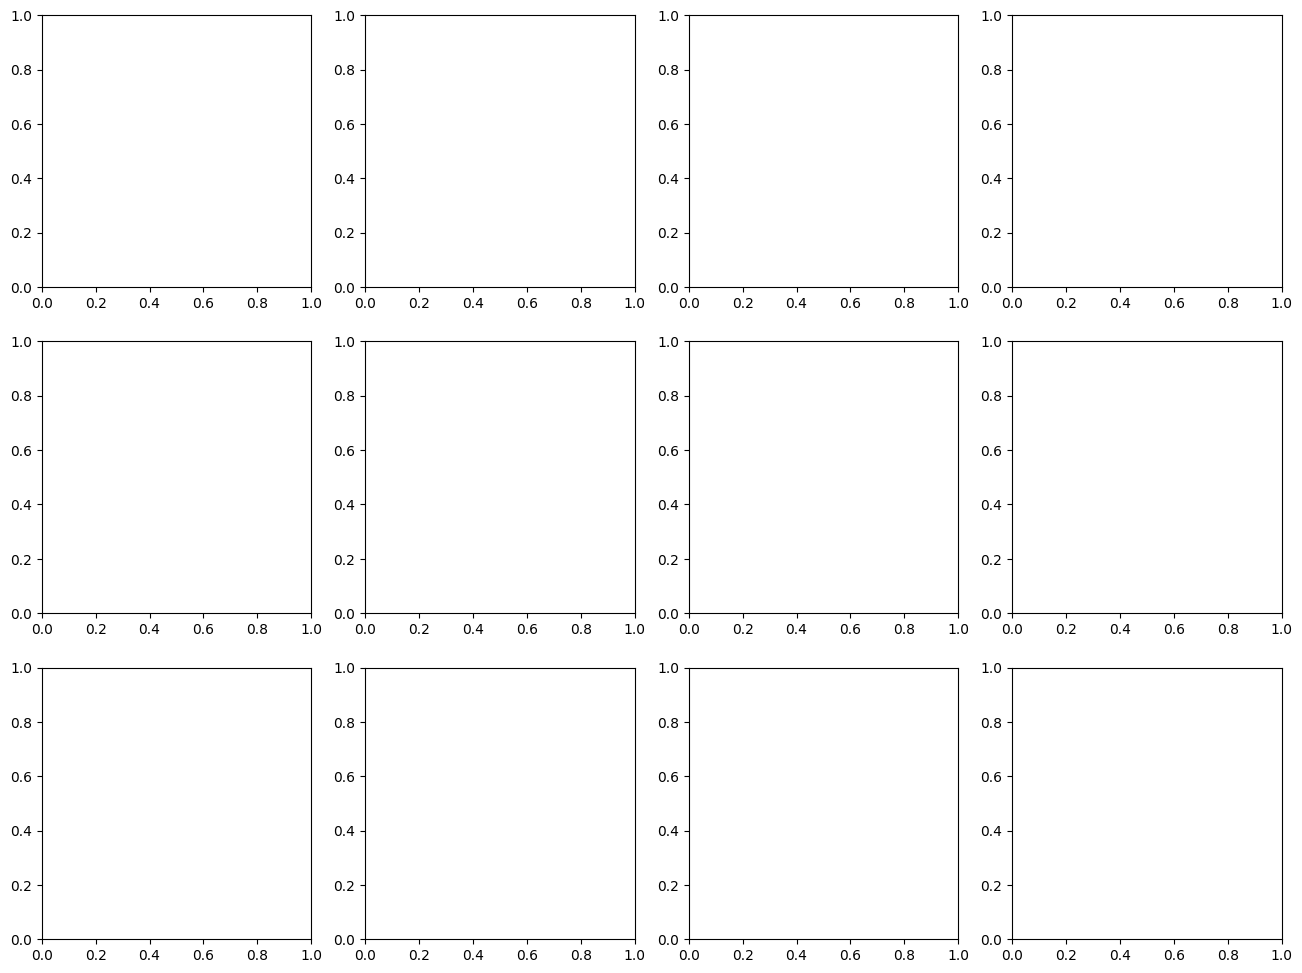

In [31]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

### 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?





**ответ**: параболический

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.



Ответ: windspeed, temp

### 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.



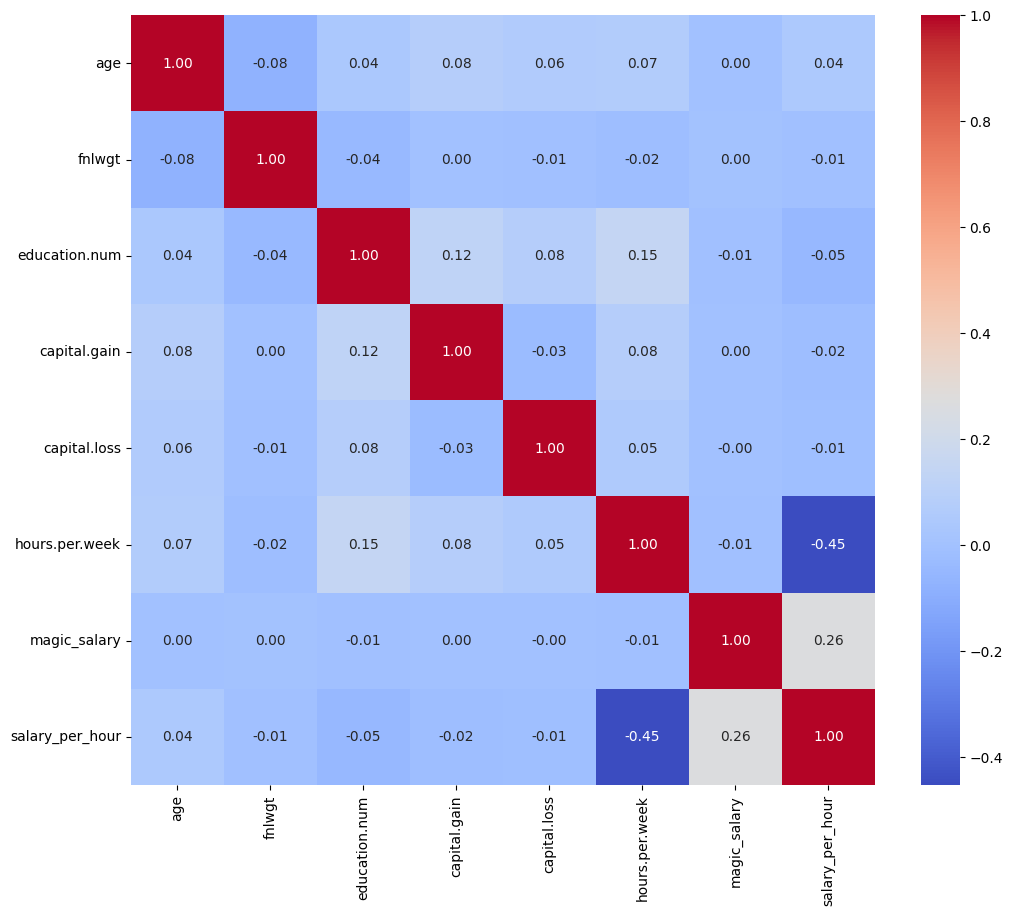

In [25]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ Меньше всего коррелирует с праздниками, рабочими и выходными днями, скоростью ветра. Больше всего коррелирует с температурой и влажностью

### 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)



In [29]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
monthly_counts = df.groupby(['year', 'month'])['count'].sum()
monthly_counts.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Год и месяц')
plt.ylabel('Количество прокатов')
plt.show()

KeyError: 'datetime'

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: Меньше всего коррелирует с праздниками, рабочими и выходными днями, скоростью ветра. Больше всего коррелирует с температурой и влажностью.

### 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,



In [39]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
monthly_counts = df.groupby(['year', 'month'])['count'].sum()
monthly_counts.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Год и месяц')
plt.ylabel('Количество прокатов')
plt.show()

KeyError: 'datetime'

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.



Ответ:Очень мало людей брали велосипед в плохую погоду, никто не брал в шторм

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?


    
Ответ: Постройте распределение целевого признака.

### 5. Распределение

Постройте распределение целевого признака.


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['day'] = df['datetime'].dt.date

daily_rentals = df.groupby('day')['count'].sum()

plt.figure(figsize=(10, 6))
sns.distplot(daily_rentals.values, bins=30, kde=True, hist=True)
plt.title('Распределение ежедневных аренд велосипедов')
plt.xlabel('Количество аренд')
plt.ylabel('Плотность')
plt.show()


**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

Ответ: 4300

### 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.



In [ ]:
sns.jointplot(x='temp', y='atemp', data=df)

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: температура с пределах от 25-37 имеет вбросы

### 7. Боксплот (ящик с усами)

Постройте график распределения (боксплот) количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.




In [40]:
sns.boxplot(x='month', y='count', hue='workingday', data=df)

ValueError: Could not interpret value `month` for `x`. An entry with this name does not appear in `data`.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.

Ответ: Зимой почти никто не берет велосипеды для прогулок на выходных

## Комплексное задание №3. Визуальный анализ данных. Часть 2

In [41]:
!pip install seaborn==0.11.0
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.2
    Uninstalling seaborn-0.13.2:
      Successfully uninstalled seaborn-0.13.2


In [42]:
colab = True # если работаете на своём компьютере, в локальной среде, поставьте False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


В этом задании Вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams.

Исходные данные загрузите самостоятельно!

In [ ]:
if colab:
    df = pd.read_csv('/content/drive/My Drive/Data/StudentsPerformance.csv')
else:
    df = pd.read_csv("../../data/StudentsPerformance.csv")

df

### Ход задания:

#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню?

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение


#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола
###### (подсказка: используете  [pd.agg()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html))

#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В